#### Download data 

We will use [weather data](https://www.bgc-jena.mpg.de/wetter/) provided by [Max Plank Institute for BiogeoChemistry](https://www.bgc-jena.mpg.de).

In [1]:
#Download the data
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip --quiet

In [2]:
!ls -l

total 13256
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
drwxr-xr-x 1 root root     4096 Sep 30 17:12 sample_data


In [3]:
#Unzip the file
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [4]:
!ls -l

total 55412
-rw-r--r-- 1 root root 43164220 Mar 19  2017 jena_climate_2009_2016.csv
-rw-r--r-- 1 root root 13568290 Jul 24  2019 jena_climate_2009_2016.csv.zip
drwxr-xr-x 1 root root     4096 Sep 30 17:12 sample_data


#### Data Exploration

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/AIML/NLP/Time Series

/content/drive/MyDrive/AIML/NLP/Time Series


In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [8]:
#Read dataset
df = pd.read_csv('jena_climate_2009_2016.csv')

In [9]:
#Let's check the dataset contents
df.head(n=5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [10]:
#Columns
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [11]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [12]:
#Check number of records
df.shape

(420551, 15)

What is the Frequency of this Time-Series data?

In [13]:
df.head(n=10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [14]:
#Check if null values
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

How should we deal missing values in Time Series data?

#### Data for Air Tempreture

Excercise #1 : Build a model which will predict future 'Air Tempreture' based on the past data.

In [15]:
#Get data for Air Tempreture
temp_df = df['T (degC)']

In [16]:
#Make Date time column as index to make sure data is sorted
temp_df.index = df['Date Time']

In [17]:
#Check data
temp_df.head(n=50)

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
01.01.2009 01:00:00   -8.05
01.01.2009 01:10:00   -7.62
01.01.2009 01:20:00   -7.62
01.01.2009 01:30:00   -7.91
01.01.2009 01:40:00   -8.43
01.01.2009 01:50:00   -8.76
01.01.2009 02:00:00   -8.88
01.01.2009 02:10:00   -8.85
01.01.2009 02:20:00   -8.83
01.01.2009 02:30:00   -8.66
01.01.2009 02:40:00   -8.66
01.01.2009 02:50:00   -8.70
01.01.2009 03:00:00   -8.81
01.01.2009 03:10:00   -8.84
01.01.2009 03:20:00   -8.94
01.01.2009 03:30:00   -8.94
01.01.2009 03:40:00   -8.86
01.01.2009 03:50:00   -8.99
01.01.2009 04:00:00   -9.05
01.01.2009 04:10:00   -9.23
01.01.2009 04:20:00   -9.49
01.01.2009 04:30:00   -9.50
01.01.2009 04:40:00   -9.35
01.01.2009 04:50:00   -9.47
01.01.2009 05:00:00   -9.63
01.01.2009 05:10:00   -9.67
01.01.2009 05:20:00   -9.68
01.01.2009 05:30:00   -9.90
01.01.2009 05:40:00   -9.91
01.01.2009 05:50:00   -9.51
01.01.2009

In [18]:
temp_df.tail(n=50)

Date Time
31.12.2016 15:50:00    3.56
31.12.2016 16:00:00    2.87
31.12.2016 16:10:00    2.44
31.12.2016 16:20:00    2.13
31.12.2016 16:30:00    1.98
31.12.2016 16:40:00    1.67
31.12.2016 16:50:00    1.61
31.12.2016 17:00:00    1.41
31.12.2016 17:10:00    1.29
31.12.2016 17:20:00    0.79
31.12.2016 17:30:00    0.44
31.12.2016 17:40:00    0.24
31.12.2016 17:50:00   -0.06
31.12.2016 18:00:00   -0.08
31.12.2016 18:10:00   -0.42
31.12.2016 18:20:00   -0.95
31.12.2016 18:30:00   -1.28
31.12.2016 18:40:00   -1.67
31.12.2016 18:50:00   -1.25
31.12.2016 19:00:00   -1.03
31.12.2016 19:10:00   -0.98
31.12.2016 19:20:00   -1.40
31.12.2016 19:30:00   -1.47
31.12.2016 19:40:00   -1.61
31.12.2016 19:50:00   -1.65
31.12.2016 20:00:00   -1.52
31.12.2016 20:10:00   -1.40
31.12.2016 20:20:00   -2.15
31.12.2016 20:30:00   -3.19
31.12.2016 20:40:00   -3.30
31.12.2016 20:50:00   -3.46
31.12.2016 21:00:00   -3.09
31.12.2016 21:10:00   -2.75
31.12.2016 21:20:00   -2.61
31.12.2016 21:30:00   -2.51
31.12.2016

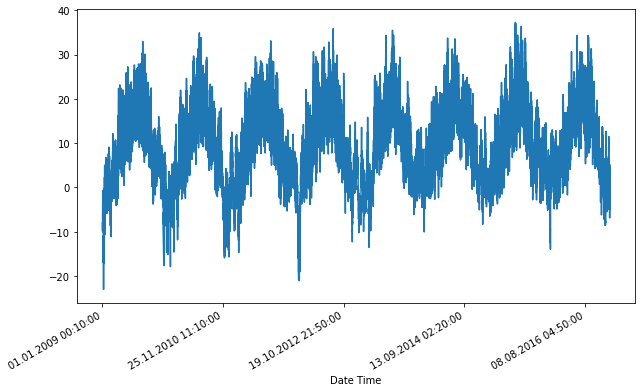

In [19]:
#Visualize data
temp_df.plot(subplots=True, figsize=(10,6))
plt.show()

In [20]:
temp_df.shape

(420551,)

#### Data Preparation

Split data between Training and Test

In [21]:
#Number of training examples - set to 80%
num_training_examples = int(0.8 * temp_df.shape[0])
num_training_examples

336440

In [22]:
#Prepare training and test data
train_data = temp_df.to_list()[:num_training_examples]
test_data = temp_df.to_list()[num_training_examples:]

In [23]:
#Check the data
print(train_data[:100])

[-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91, -8.43, -8.76, -8.88, -8.85, -8.83, -8.66, -8.66, -8.7, -8.81, -8.84, -8.94, -8.94, -8.86, -8.99, -9.05, -9.23, -9.49, -9.5, -9.35, -9.47, -9.63, -9.67, -9.68, -9.9, -9.91, -9.51, -9.67, -9.59, -9.15, -8.91, -9.04, -9.43, -9.17, -8.71, -8.55, -8.4, -8.3, -8.13, -8.1, -8.14, -8.06, -7.95, -7.74, -7.57, -7.66, -7.71, -7.56, -7.29, -7.15, -7.02, -7.04, -7.03, -7.15, -7.26, -7.34, -7.35, -7.41, -7.48, -7.38, -7.21, -7.16, -7.03, -6.87, -6.77, -6.7, -6.61, -6.51, -6.21, -5.89, -5.83, -5.76, -5.9, -5.97, -5.88, -5.94, -5.84, -5.76, -5.75, -5.76, -5.73, -5.69, -5.53, -5.57, -5.43, -5.32, -5.36, -5.4, -5.31, -5.28, -5.32, -5.29]


In [24]:
#Find the mean standard deviation
mean = np.array(train_data).mean()
std = np.array(train_data).std()

In [25]:
mean, std

(8.987612768992983, 8.440672143902399)

Normalize the data

In [26]:
#Normalize training and test data
norm_train = (np.array(train_data) - mean)/std
norm_test  = (np.array(test_data) - mean)/std

In [27]:
norm_train[:100]

array([-2.01495953, -2.06116438, -2.07301178, -2.04931698, -2.04457802,
       -2.01851375, -1.96756994, -1.96756994, -2.00192739, -2.06353386,
       -2.10263027, -2.11684715, -2.11329293, -2.11092345, -2.09078287,
       -2.09078287, -2.09552183, -2.10855397, -2.11210819, -2.12395559,
       -2.12395559, -2.11447767, -2.12987929, -2.13698773, -2.15831304,
       -2.18911628, -2.19030102, -2.17252992, -2.1867468 , -2.20570263,
       -2.21044159, -2.21162633, -2.23769061, -2.23887535, -2.19148576,
       -2.21044159, -2.20096367, -2.14883512, -2.12040137, -2.13580299,
       -2.18200784, -2.1512046 , -2.09670657, -2.07775074, -2.05997964,
       -2.04813224, -2.02799167, -2.02443745, -2.02917641, -2.01969849,
       -2.00666635, -1.98178682, -1.96164624, -1.9723089 , -1.9782326 ,
       -1.9604615 , -1.92847353, -1.91188717, -1.89648555, -1.89885503,
       -1.89767029, -1.91188717, -1.92491931, -1.93439722, -1.93558196,
       -1.9426904 , -1.95098358, -1.93913618, -1.91899561, -1.91

In [28]:
def prepare_xy(dataset, window_size=20):

    dataX, dataY = [], []
    
    for i in range(len(dataset)-window_size):
        
        #Prepare input features
        input_features = dataset[i:(i+window_size)]        
        dataX.append(input_features)

        #Prepare Label
        label = dataset[i + window_size]
        dataY.append(label)
    
    return np.array(dataX), np.array(dataY)

In [29]:
#Prepare x,y for train and test
train_x, train_y = prepare_xy(norm_train)
test_x, test_y = prepare_xy(norm_test)

Build X (Input features) and y (Label) for Model training

In [30]:
train_x.shape

(336420, 20)

In [31]:
train_y.shape

(336420,)

In [32]:
#First example input features (x) 
train_x[0]

array([-2.01495953, -2.06116438, -2.07301178, -2.04931698, -2.04457802,
       -2.01851375, -1.96756994, -1.96756994, -2.00192739, -2.06353386,
       -2.10263027, -2.11684715, -2.11329293, -2.11092345, -2.09078287,
       -2.09078287, -2.09552183, -2.10855397, -2.11210819, -2.12395559])

In [33]:
#First example label (y)
train_y[0]

-2.1239555882932875

Visualize single example

In [34]:
def show_example(input_features, target, prediction=None):

    #Plot historical values
    plt.plot(list(range(input_features.shape[0])), input_features.flatten(), '.-', label='History' )
    
    #Plot target
    plt.plot(input_features.shape[0]+1, target, 'rx', markersize=10, label='Actual')

    #Plot prediction, if applicable
    if prediction:
        plt.plot(input_features.shape[0]+1, prediction, 'go', markersize=10, label='Prediction')

    plt.legend()
    plt.show()

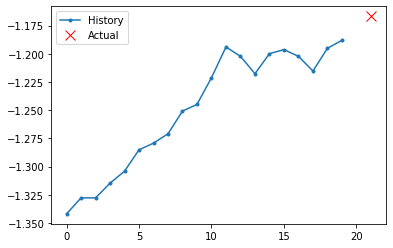

In [35]:
#Display examples
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num])

Prediction using Average method

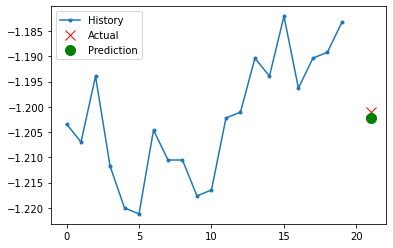

In [36]:
#Prediction is taken as average of all the points in sequence e.g 20
exp_num = np.random.randint(0, train_x.shape[0])
show_example(train_x[exp_num], train_y[exp_num], train_x[exp_num].mean())

#### Build Model

In [37]:
import tensorflow as tf

In [38]:
#Random seed for reproducibility
tf.random.set_seed(13)

In [39]:
#Build Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

#Add LSTM layer
model.add(tf.keras.layers.LSTM(8, input_shape=(train_x.shape[1], 1,)))

#Add Output layer
model.add(tf.keras.layers.Dense(1))

In [40]:
#Compile the model
model.compile(optimizer='adam', loss='mae')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


Train the model

- Convert batch to be 3 dimensional data : Batch size x Sequence length x 1

In [42]:
train_x.shape

(336420, 20)

In [43]:
train_x = np.expand_dims(train_x, axis=2)
test_x = np.expand_dims(test_x, axis=2)

In [44]:
train_x.shape

(336420, 20, 1)

In [45]:
train_y.shape

(336420,)

In [46]:
model.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=20, 
          batch_size=256)

Epoch 1/20
1315/1315 [==============================] - 16s 10ms/step - loss: 0.0652 - val_loss: 0.0226
Epoch 2/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0192 - val_loss: 0.0178
Epoch 3/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0168 - val_loss: 0.0164
Epoch 4/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 5/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0155 - val_loss: 0.0157
Epoch 6/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 7/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 8/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 9/20
1315/1315 [==============================] - 13s 10ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 10/20
1315/1315 [==============================] - 13s 10m

In [47]:
#Model Prediction on first example
a = model.predict(test_x[0:1])
print('Normalized Prediction', a)

Normalized Prediction [[0.63099504]]


In [48]:
print('De-normalized Prediction', a * std + mean)

De-normalized Prediction [[14.313635]]


In [49]:
#Actual 
test_y[0]*std+mean

14.3

Visualize Model prediction

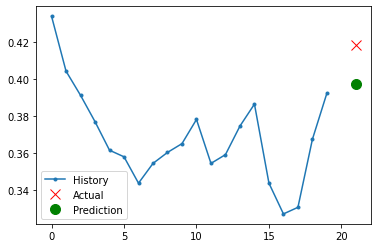

In [50]:
#Pick a test example
exp_num = np.random.randint(0, test_x.shape[0])

#Make input example a batch of 1
prediction = model.predict(np.expand_dims(test_x[exp_num], axis=0))

#Visualize
show_example(test_x[exp_num], test_y[exp_num], prediction[0])

#### Mutiple Time Series - Data Preparation

In [51]:
#Air tempreture, pressure and air density
features_to_include = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']

#Get data
multi_df = df[features_to_include]
multi_df.index = df['Date Time']

In [52]:
multi_df.head(n=10)

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,-8.02,996.52,1307.75
01.01.2009 00:20:00,-8.41,996.57,1309.80
01.01.2009 00:30:00,-8.51,996.53,1310.24
01.01.2009 00:40:00,-8.31,996.51,1309.19
01.01.2009 00:50:00,-8.27,996.51,1309.00
01.01.2009 01:00:00,-8.05,996.50,1307.86
01.01.2009 01:10:00,-7.62,996.50,1305.68
01.01.2009 01:20:00,-7.62,996.50,1305.69
01.01.2009 01:30:00,-7.91,996.50,1307.17


In [53]:
num_training_examples = int(0.8 * multi_df.shape[0])

In [54]:
#Train and Test data
train_df = multi_df.iloc[:num_training_examples,:]
test_df = multi_df.iloc[num_training_examples:,:]

In [55]:
train_df.shape

(336440, 3)

Normalize data

In [56]:
#Find mean and standard deviation
mean_multi = train_df.mean()
std_multi = train_df.std()

In [57]:
mean_multi

T (degC)           8.987613
p (mbar)         988.832741
rho (g/m**3)    1217.704598
dtype: float64

In [58]:
std_multi

T (degC)         8.440685
p (mbar)         8.349543
rho (g/m**3)    40.129560
dtype: float64

In [59]:
#Normalize Train and Test data
norm_train_df = (train_df - mean_multi)/std_multi
norm_test_df = (test_df - mean_multi)/std_multi

In [60]:
norm_train_df.sample(n=5)

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
08.03.2009 13:00:00,-0.314857,-1.214766,-0.028772
13.10.2009 13:30:00,-0.197568,0.828460,0.404575
05.06.2009 20:50:00,0.013315,-0.685396,-0.197725
21.01.2009 22:00:00,-1.323070,-0.700965,1.085868
28.09.2012 05:30:00,0.388877,0.087102,-0.377393


Prepare X and Y

In [61]:
def prepare_xy_multi(dataset, num_time_series=3, window_size=[20,15,10], target_series=0):

    dataX, dataY = [], []

    act_data = []

    for i in range(num_time_series):
        dataX.append([]) #Initialize an empty list for each time series
        act_data.append(dataset.iloc[:,i].to_list())

    #Get max window size
    max_window_size = max(window_size)

    for i in range(len(dataset)-max_window_size):
        
        #Prepare input for each time series
        for j in range(num_time_series):

            #Prepare input features
            input_features = act_data[j][(i+max_window_size-window_size[j]):(i+max_window_size)]
            dataX[j].append(input_features)

        #Prepare Label
        label = act_data[target_series][i + max_window_size]
        dataY.append(label)
    
    return dataX, dataY

In [62]:
#Prepare Training and Test X, y
train_x_multi, train_y_multi = prepare_xy_multi(norm_train_df)
test_x_multi, test_y_multi = prepare_xy_multi(norm_test_df)

In [63]:
len(train_x_multi)

3

In [64]:
train_x_multi[2][0]

[2.3408032109509063,
 2.3560039758001605,
 2.3525152756708203,
 2.35351204713635,
 2.334075003558607,
 2.3343241964249937,
 2.3408032109509063,
 2.354259625735493,
 2.358994290196733,
 2.374942633645136]

#### Build Model II

In [65]:
import tensorflow as tf

In [66]:
#Build 3 input layers - one for each time series
input_1 = tf.keras.layers.Input(shape=(20,1)) #Tempreture
input_2 = tf.keras.layers.Input(shape=(15,1)) #Pressure
input_3 = tf.keras.layers.Input(shape=(10,1)) #Relative humidity

In [67]:
#Build 3 LSTM Layers - One for each time series
lstm_1 = tf.keras.layers.LSTM(8)(input_1)
lstm_2 = tf.keras.layers.LSTM(6)(input_2)
lstm_3 = tf.keras.layers.LSTM(5)(input_3)

In [68]:
lstm_1

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'lstm_1')>

In [69]:
lstm_2

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'lstm_2')>

In [70]:
lstm_3

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'lstm_3')>

In [71]:
#Concatenate LSTM layers output
cat = tf.keras.layers.concatenate([lstm_1, lstm_2, lstm_3])

In [72]:
cat

<KerasTensor: shape=(None, 19) dtype=float32 (created by layer 'concatenate')>

In [73]:
#Output Layer
op = tf.keras.layers.Dense(1)(cat)

In [74]:
op

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [75]:
#Build Non-Sequential Model
model_multi = tf.keras.Model([input_1, input_2, input_3], #3 Inputs
                             op) #Output

In [76]:
#compile model 
model_multi.compile(optimizer='adam', loss='mae')

In [77]:
model_multi.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20, 1)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 15, 1)]      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 8)            320         input_1[0][0]                    
______________________________________________________________________________________________

##### Model Training

We need to feed 3 inputs. Each input will be 3 dimensional

In [78]:
#Build data for training
train_x_multi_1 = np.reshape(np.array(train_x_multi[0]), (len(train_x_multi[0]),len(train_x_multi[0][1]),1 ))
train_x_multi_2 = np.reshape(np.array(train_x_multi[1]), (len(train_x_multi[1]),len(train_x_multi[1][1]),1 ))
train_x_multi_3 = np.reshape(np.array(train_x_multi[2]), (len(train_x_multi[2]),len(train_x_multi[2][1]),1 ))

In [79]:
train_x_multi_1.shape

(336420, 20, 1)

In [80]:
#Build data for test
test_x_multi_1 = np.reshape(np.array(test_x_multi[0]), (len(test_x_multi[0]),len(test_x_multi[0][1]),1 ))
test_x_multi_2 = np.reshape(np.array(test_x_multi[1]), (len(test_x_multi[1]),len(test_x_multi[1][1]),1 ))
test_x_multi_3 = np.reshape(np.array(test_x_multi[2]), (len(test_x_multi[2]),len(test_x_multi[2][1]),1 ))

In [81]:
test_x_multi_1.shape

(84091, 20, 1)

In [82]:
#Model training
model_multi.fit([train_x_multi_1, train_x_multi_2, train_x_multi_3], np.array(train_y_multi), 
                validation_data=([test_x_multi_1, test_x_multi_2, test_x_multi_3], np.array(test_y_multi)), 
                epochs=10, 
                batch_size=256)

Epoch 1/10
1315/1315 [==============================] - 28s 18ms/step - loss: 0.0914 - val_loss: 0.0252
Epoch 2/10
1315/1315 [==============================] - 23s 18ms/step - loss: 0.0211 - val_loss: 0.0190
Epoch 3/10
1315/1315 [==============================] - 23s 18ms/step - loss: 0.0178 - val_loss: 0.0179
Epoch 4/10
1315/1315 [==============================] - 23s 17ms/step - loss: 0.0165 - val_loss: 0.0172
Epoch 5/10
1315/1315 [==============================] - 23s 17ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 6/10
1315/1315 [==============================] - 23s 17ms/step - loss: 0.0156 - val_loss: 0.0163
Epoch 7/10
1315/1315 [==============================] - 23s 18ms/step - loss: 0.0155 - val_loss: 0.0166
Epoch 8/10
1315/1315 [==============================] - 23s 17ms/step - loss: 0.0154 - val_loss: 0.0160
Epoch 9/10
1315/1315 [==============================] - 23s 18ms/step - loss: 0.0154 - val_loss: 0.0165
Epoch 10/10
1315/1315 [==============================] - 23s 18m

Visualize Model Prediction

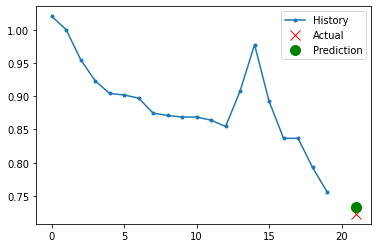

In [83]:
#Pick a test example
exp_num = np.random.randint(0, len(test_y_multi))

#Prepare 3 batch inputs - each 3 dimensional
in_1 = np.expand_dims(np.array(test_x_multi[0][exp_num]), axis=0)
in_2 = np.expand_dims(np.array(test_x_multi[1][exp_num]), axis=0)
in_3 = np.expand_dims(np.array(test_x_multi[2][exp_num]), axis=0)

#print(in_1.shape, in_2.shape)
#Make prediction
prediction = model_multi.predict([in_1, in_2, in_3])

#Visualize
show_example(in_1[0], test_y_multi[exp_num], prediction[0])

Using Single LSTM with same time window for multiple time series

In [84]:
train_x_multi, train_y_multi = prepare_xy_multi(norm_train_df, window_size=(20,20,20))
test_x_multi, test_y_multi = prepare_xy_multi(norm_test_df, window_size=(20,20,20))

In [85]:
train_x = np.concatenate([np.reshape(train_x_multi[0], (-1, 20,1)), 
                          np.reshape(train_x_multi[1], (-1, 20,1)), 
                          np.reshape(train_x_multi[2], (-1, 20,1))], axis=2) 

In [86]:
train_x.shape

(336420, 20, 3)

In [87]:
test_x = np.concatenate([np.reshape(test_x_multi[0], (-1, 20,1)), 
                          np.reshape(test_x_multi[1], (-1, 20,1)), 
                          np.reshape(test_x_multi[2], (-1, 20,1))], axis=2) 

In [88]:
test_x.shape

(84091, 20, 3)

In [89]:
model1 = tf.keras.Sequential()

In [90]:
model1.add(tf.keras.layers.LSTM(8, input_shape=(20,3,)))

In [91]:
model1.add(tf.keras.layers.Dense(1))

In [92]:
model1.compile(optimizer='adam', loss='mae')

In [93]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 8)                 384       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [94]:
model1.fit(train_x, np.array(train_y_multi), epochs=5, batch_size=200)

Epoch 1/5
1683/1683 [==============================] - 18s 10ms/step - loss: 0.0845
Epoch 2/5
1683/1683 [==============================] - 16s 9ms/step - loss: 0.0191
Epoch 3/5
1683/1683 [==============================] - 16s 10ms/step - loss: 0.0167
Epoch 4/5
1683/1683 [==============================] - 16s 10ms/step - loss: 0.0159
Epoch 5/5
1683/1683 [==============================] - 16s 9ms/step - loss: 0.0155


In [95]:
#Pick a test example
exp_num = np.random.randint(0, test_x.shape[0])

#Prepare 3 batch inputs - each 3 dimensional
in_1 = np.expand_dims(test_x[exp_num], axis=0)

#Make prediction
prediction = model1.predict(in_1)

#Visualize
#show_example(in_1[0], test_y_multi[exp_num], prediction[0])
prediction

array([[2.0039876]], dtype=float32)